In [11]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving AB_NYC_2019.csv to AB_NYC_2019.csv


In [12]:
import io
df = pd.read_csv(io.BytesIO(list(uploaded.values())[0]))

print("Initial shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())

Initial shape: (48895, 16)

Missing values:
 id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [13]:
df['name'].fillna("Unknown Listing", inplace=True)
df['host_name'].fillna("Unknown Host", inplace=True)
df['last_review'] = pd.to_datetime(df['last_review'])
df['reviews_per_month'].fillna(0, inplace=True)

<ipython-input-13-2816455695>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['name'].fillna("Unknown Listing", inplace=True)
<ipython-input-13-2816455695>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [16]:
df = df[df['price'] < 1000]
df = df[df['minimum_nights'] < 365]

In [17]:
print("\n✅ Cleaned shape:", df.shape)
print("\nMissing values after cleaning:\n", df.isnull().sum())


✅ Cleaned shape: (48557, 16)

Missing values after cleaning:
 id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       9875
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
dtype: int64


In [18]:
df.to_csv("Cleaned_AB_NYC_2019.csv", index=False)
from google.colab import files
files.download("Cleaned_AB_NYC_2019.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

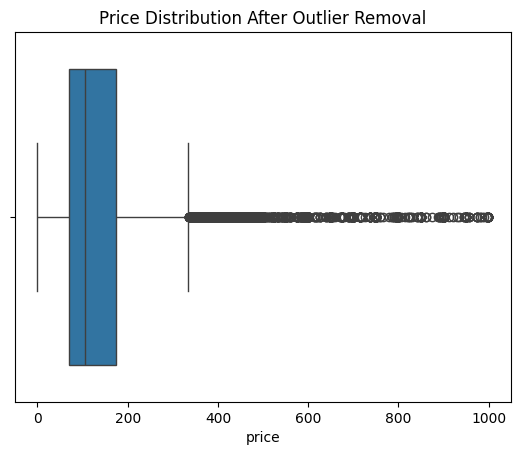

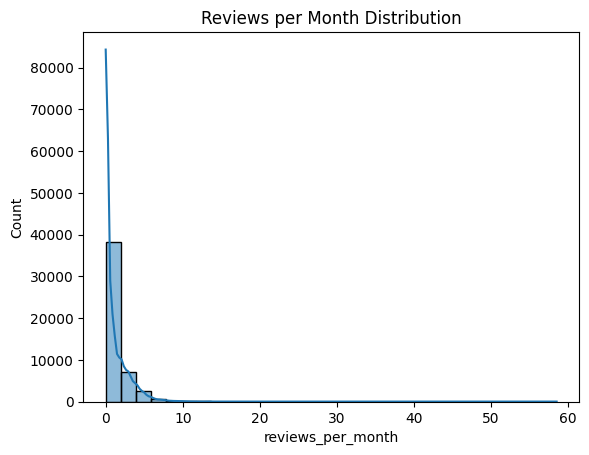

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['price'])
plt.title("Price Distribution After Outlier Removal")
plt.show()

sns.histplot(df['reviews_per_month'], bins=30, kde=True)
plt.title("Reviews per Month Distribution")
plt.show()